# การสร้าง Model สำหรับ Text Classification โดยใช้ Bag-of-word Feature กับ Standard Feedforward Neural Network

In [190]:
pip install thai_tokenizer

In [191]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [192]:
import csv
import numpy as np
import deepcut
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical, set_random_seed
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.metrics import confusion_matrix

set_random_seed(99)

**Read raw data form music_tu.csv.**

ขอให้ Copy File music_tu.csv ที่จะใช้ในตัวอย่างนี้จาก url ด้านล่างนี้ลงใน Google Drive ของตนเอง

https://drive.google.com/file/d/1B62Bl-mmZPrPmPWQDTczXJ_L6YPTwkK6/view?usp=sharing

และเปลี่ยนตำแหน่งของไฟล์ music_tu.csv ใน Source Code ด้านล่างนี้จาก '/content/drive/MyDrive/music_tu.csv' ไปเป็นตำแหน่งที่นักศึกษา Copy Folder ของภาพไว้ใน Google Drive ของตัวเอง

In [242]:
# Read input.txt and ans.txt into separate lists
with open('input.txt', 'r', encoding='utf-8-sig') as input_file:
    input_data = [line.strip().split('::')[1] for line in input_file]

with open('ans.txt', 'r', encoding='utf-8-sig') as ans_file:
    ans_data = [line.strip().split('::')[1] for line in ans_file]
    
ans_data = [item[0] for item in ans_data]

# Create a list to store the combined data
combined_data = []

# Iterate through the input and ans data and combine them
for input_line, ans_line in zip(input_data, ans_data):
    combined_line = [ans_line, input_line]
    combined_data.append(combined_line)

# Shuffle the input data
shuffle(combined_data)
# Print the result as a list of lists
for combined_line in combined_data:
    print(combined_line)

['P', 'ตาของฉันมองแฟนของฉันแล้วบอกว่าสวยดี']
['E', 'ป้ามีตาซ้ายข้างเดียว']
['P', 'ตาเป็นนักแข่งรถที่เก่งที่สุดในโลกเลย']
['P', 'คุณตาตัดแว่นตาแล้วอ่านหนังสือง่ายขึ้นเยอะ']
['P', 'ตาของฉันสายตาปกติเพราะกินผักประจำ']
['E', 'ตาของซุปเปอร์แมนสามารถยิงลำแสงความร้อนได้มาตั้งแต่รุ่นตาของเขาแล้ว']
['E', 'การมองหน้าจอคอมมากเกินไปจะทำให้ประสาทตาทำงานหนัก ทำให้เกิดอาการปวดตาได้']
['E', 'เข้าเมืองตาหลิ่วต้องหลิ่วตาตาม']
['P', 'มาเดินเล่นกับตา อยู่ดีๆฝุ่นเข้าตาร้องไห้เลย']
['E', 'บางคนก็มองว่าคนสายตาสั้นมองไม่เห็นอะไรเลยซึ่งมันไม่ใช่']
['E', 'ดวงตาของฉันนั้นมืดมิด แต่ชีวิตของฉันไม่มืดมน']
['E', 'อย่าบอกใครอื่นเลยหนา ข้าจะมอบดวงตาทั้งสองข้างให้แก่ท่าน ตานี้ถือว่าข้าขอนะ']
['E', 'เธอสะกดเขาด้วยแววตาอิ่มน้ำกับใบหน้าจิ้มลิ้ม']
['P', 'คุณตาอยู่จังหวัดอะไรคะ']
['P', 'ขณะวิ่งตาตุ่มของตาแกอาจได้รับความเสียหายหากวิ่งผิดวิธี']
['E', 'ตอนนี้ตาของเขาเริ่มจะปิดแล้วเพราะความง่วงเริ่มครอบงำ']
['P', 'ตาบวนขับรถไถไปที่ไร่ของตาลือ']
['P', 'ตามตำนานที่เล่าขานตาจงลี่อยู่มาหลายพันปีแล้ว']
['E', 'ตัวต่อพันปีมีเครื่องหมา

**Create dataset. Extract labels and sentences.**

In [194]:
labels = [d[0] for d in combined_data]
sentences = [d[1] for d in combined_data]

print(labels)
print(sentences)

['T', 'P', 'P', 'T', 'E', 'E', 'P', 'P', 'E', 'E', 'P', 'E', 'E', 'T', 'T', 'P', 'T', 'E', 'P', 'E', 'P', 'E', 'P', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'E', 'P', 'P', 'P', 'T', 'P', 'E', 'E', 'P', 'E', 'E', 'P', 'P', 'P', 'P', 'P', 'E', 'P', 'P', 'T', 'P', 'E', 'E', 'P', 'E', 'E', 'E', 'P', 'T', 'T', 'P', 'P', 'E', 'P', 'T', 'E', 'P', 'E', 'P', 'P', 'E', 'E', 'P', 'P', 'T', 'E', 'P', 'E', 'T', 'E', 'T', 'T', 'P', 'E', 'P', 'E', 'P', 'T', 'T', 'E', 'E', 'E', 'E', 'P', 'E', 'P', 'E', 'P', 'P', 'T', 'E', 'E', 'E', 'E', 'E', 'P', 'P', 'E', 'P', 'T', 'E', 'P', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'P', 'E', 'P', 'P', 'E', 'P', 'E', 'T', 'P', 'P', 'T', 'P', 'E', 'E', 'E', 'E', 'T', 'T', 'P', 'T', 'T', 'E', 'T', 'T', 'P', 'E', 'P', 'P', 'T', 'P', 'T', 'E', 'P', 'E', 'P', 'E', 'P', 'T', 'E', 'E', 'P', 'E', 'T', 'P', 'P', 'E', 'P', 'P', 'E', 'P', 'E', 'T', 'P', 'T', 'E', 'E', 'P', 'P', 'P', 'E', 'E', 'E', 'T', 'E', 'E', 'P', 'E', 'P', 'T', 'E', 'E', 'P', 'E', 'P', 'P', 'T', 'E',

**Tokenize each sentence into a list of words.**

In [195]:
# words = [[w for w in deepcut.tokenize(s) if w != ' '] for s in sentences]
# for sentence in words:
#     print(sentence)
    
from thai_tokenizer import Tokenizer
tokenizer = Tokenizer()
# Tokenize the sentences using the ThaiTokenizer
words = [[w for w in tokenizer.split(s) if w != ' '] for s in sentences]

# Print the tokenized words
for sentence in words:
    print(sentence)

['ตา', 'นี้', 'ก็', 'เข้า', 'เกม', 'ไม่', 'ได้', 'ตา', 'หน้า', 'ก็', 'ไม่', 'ได้', 'เล่น']
['ตา', 'ของ', 'แม่สาย', 'ตา', 'ยาว']
['นาง', 'สาว', 'มุ', 'ทิ', 'ตา', 'ได้', 'รางวัล', 'จาก', 'ตา', 'เพราะ', 'เรียน', 'ได้', 'ที่', 'หนึ่ง']
['ไม่', 'มี', 'ตา', 'ไหน', 'ที่', 'เธอ', 'ไม่', 'โย', 'น', 'เกม']
['หมอ', 'ตา', 'ตรว', 'จด', 'วง', 'ตา', 'ของ', 'ฉัน']
['การ', 'นอน', 'ตะ', 'แค', 'ง', 'เล่น', 'โทรศัพท์', 'มี', 'โอกาส', 'ทำ', 'ให้', 'สาย', 'ตา', 'เอียง']
['เธอ', 'ดู', 'สิ', 'ตา', 'คน', 'นี้', 'นี่', 'แห', 'ละ', 'ที่', 'ถูก', 'ทิ้ง', 'ไป', 'ตอน', 'เด็ก', 'ทำไม', 'ตา', 'คน', 'นี้', 'ถึง', 'มี', 'ชีวิต', 'ที่', 'ดี', 'ขึ้น', 'ขนาด', 'นี้', 'นะ']
['ตา', 'แก่', 'สอง', 'คน', 'กำลัง', 'นั่ง', 'จ้', 'อง', 'ตา', 'กัน']
['v', 'e', 'l', "'", 'k', 'o', 'z', 'เป็น', 'สัตว์', 'ประ', 'หลาด', 'จาก', 'V', 'o', 'i', 'd', 'ที่', 'มีด', 'วง', 'ตา', 'ขนาด', 'ใหญ่', 'อยู่', 'ตรง', 'กลาง']
['ตา', 'ของ', 'เขา', 'เป็น', 'สี', 'น้ำ', 'ตาล']
['คุณ', 'ตา', 'และ', 'คุณ', 'ยาย', 'ตอน', 'นี้', 'แก่', 'มาก', 'แล้ว', 'เลย',

**Find all possible words (vocab).**

In [196]:
vocab = set([w for s in words for w in s])
print('Vocab size = '+str(len(vocab)))
print(vocab)


Vocab size = 2790
{'ล้าน', 'น', 'โทร', 'เท่า', 'หล', 'ล่า', 'สึ', 'ทุ่ง', 'รี้', 'โล่', 'หลาม', 'รีบ', 'เหยี', 'ปรับ', 'หื่', 'อป', 'จอบ', 'ป่วย', 'สไตล์', 'เทพ', 'มน', 'สามา', 'สา', 'คาร', 'ร้าน', 'เส', 'เร็', 'หาร', 'สุเทพ', 'กู', 'กล้วย', 'จิต', 'อุ', 'บรรยากาศ', 'นึ', 'กาน', 'ซ่า', 'ศพ', 'สัก', 'อมา', 'ตรา', 'เละ', 'ป้าย', 'โธ่', 'ภัย', 'ตาด', 'ซิน', 'แถว', 'ซอย', 'โคม', 'ส์', 'ตำแหน่ง', 'ย้าย', 'โฟ', 'บน', 'โตเกียว', 'ชิน', 'โย', 'สุริ', 'เมย์', 'ดนตรี', 'ม้วน', 'ยักษ์', 'ขีด', 'หลุย', 'นาย', 'ยืด', 'น่ะ', 'ใค', 'ตะโก', '"', 'ชื้น', 'ท่าน', 'หู', 'อพาร์ท', 'ขัน', 'ลาด', 'นิรภัย', 'เสีย', 'วิ่ง', 'ห้อง', 'คาเฟ่', 'เหี่', 'ดำ', 'นักสืบ', 'ต่อ', 'เฉี่ยว', 'ณ', 'แคป', 'ค่', 'ขุ่น', 'ริด', 'หาง', 'เสา', 'ยด', 'ห่า', 'วาย', 'ทั่ว', 'ลำปาง', 'เรล', 'จ้า', 'รอด', '5', 'กำลัง', 'สอบ', 'ลึก', 'เช้า', 'ประสิทธิภาพ', 'คล้า', 'สวัสดี', 'เหนือ', 'ครอบ', 'เกือบ', 'ฮัน', 'เบลอ', 'คอมพิวเตอร์', 'ตำ', 'แจ้', 'ลาซา', 'นคร', 'เร็ว', '1', 'ศักดิ์', 'บวม', 'ชู้', 'นิด', 'คุ้', 'กำแพง', 'บา', 'โง่', 'ช่

**Extract bag-of-word feature for each sentence**

In [197]:
bag_of_words = np.zeros((len(words),len(vocab)))
for i in range(0,len(words)): # i = sentence id
    count = 0
    for j in range(0,len(words[i])): # j = word id
        k = 0
        for w in vocab:
            if(words[i][j] == w):
                bag_of_words[i][k] = bag_of_words[i][k]+1
                count = count+1
            k = k+1
    bag_of_words[i] = bag_of_words[i]/count

print(bag_of_words.shape)
print(bag_of_words[0])

(4818, 2790)
[0. 0. 0. ... 0. 0. 0.]


**Create a feedforward neural network.**

In [262]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Assuming you have defined your vocabulary size and num_classes
vocab_size = len(vocab)
num_classes = 3

input_layer = Input(shape=(vocab_size,))
h1 = Dense(64, activation="tanh")(input_layer)
dropout_layer = Dropout(0.5)(h1)
h2 = Dense(64, activation="tanh")(dropout_layer)
dropout_layer = Dropout(0.5)(h2)
h3 = Dense(64, activation="tanh")(dropout_layer)
dropout_layer = Dropout(0.5)(h3)
h4 = Dense(64, activation="tanh")(dropout_layer)
dropout_layer = Dropout(0.5)(h4)
h5 = Dense(64, activation="tanh")(dropout_layer)
dropout_layer = Dropout(0.5)(h5)
h6 = Dense(64, activation="tanh")(dropout_layer)

output_layer = Dense(num_classes, activation="softmax")(h6)

model = Model(inputs=input_layer, outputs=output_layer)

# Define learning rate and optimizer
custom_learning_rate = 0.01
custom_optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model
model.compile(optimizer=custom_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

print(model.summary())

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 2790)]            0         
                                                                 
 dense_233 (Dense)           (None, 64)                178624    
                                                                 
 dropout_128 (Dropout)       (None, 64)                0         
                                                                 
 dense_234 (Dense)           (None, 64)                4160      
                                                                 
 dropout_129 (Dropout)       (None, 64)                0         
                                                                 
 dense_235 (Dense)           (None, 64)                4160      
                                                                 
 dropout_130 (Dropout)       (None, 64)                0  

**Train the network with training set + validation set of 240 samples (0-239).**

In [272]:
unique_labels = np.unique(labels)
num_classes = len(unique_labels)
print(f"Number of unique classes: {num_classes}")
print(f"Unique classes: {unique_labels}")
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)

# Define a ModelCheckpoint callback to save the best model weights
model_checkpoint = ModelCheckpoint(
    "model_7.h5",
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,  # Save only the best models
    mode="max",  # Save when validation accuracy is maximized
    verbose=1,
)

# Train 80% of the data
# Test 20% of the data
# Validation 50% of the data
history = model.fit(
    bag_of_words[:3855],
    one_hot_labels[:3855],
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    callbacks=[model_checkpoint],
)

Number of unique classes: 3
Unique classes: ['E' 'P' 'T']
Epoch 1/100
61/62 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.9082
Epoch 1: val_accuracy improved from -inf to 0.73671, saving model to model_7.h5
62/62 [==============================] - 2s 29ms/step - loss: 0.2812 - accuracy: 0.9082 - val_loss: 0.9865 - val_accuracy: 0.7367
Epoch 2/100
61/62 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8970
Epoch 2: val_accuracy improved from 0.73671 to 0.74708, saving model to model_7.h5
62/62 [==============================] - 1s 22ms/step - loss: 0.3348 - accuracy: 0.8975 - val_loss: 0.9116 - val_accuracy: 0.7471
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8920
Epoch 3: val_accuracy did not improve from 0.74708
62/62 [==============================] - 1s 20ms/step - loss: 0.3437 - accuracy: 0.8920 - val_loss: 1.0223 - val_accuracy: 0.7341
Epoch 4/100
60/62 [============================>.] - 

KeyboardInterrupt: 

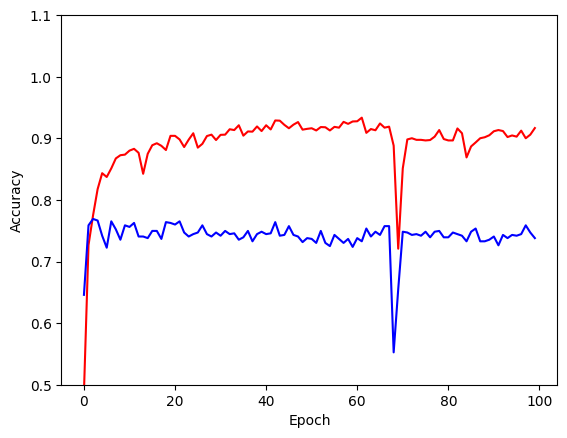

In [264]:
plt.plot(history.history['accuracy'], label='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.show()

**Test the network with test set of 60 samples (240-299).**

In [267]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 294.6/294.6 kB 1.2 MB/s eta 0:00:00


31/31 [==============================] - 0s 6ms/step


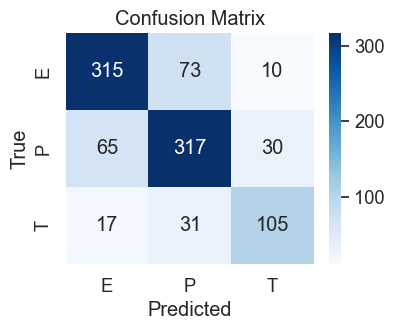

Accuracy
0.7653167185877466
Classification Report
              precision    recall  f1-score   support

           E       0.79      0.79      0.79       398
           P       0.75      0.77      0.76       412
           T       0.72      0.69      0.70       153

    accuracy                           0.77       963
   macro avg       0.76      0.75      0.75       963
weighted avg       0.77      0.77      0.77       963



In [270]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you have a test dataset called 'test_bag_of_words' and 'test_labels'
test_bag_of_words = bag_of_words[3855:]
test_labels = labels[3855:]

# Calculate predicted probabilities
y_pred_probs = model.predict(test_bag_of_words)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Encode true labels using the same LabelEncoder
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(test_labels)

# Calculate confusion matrix
cm = confusion_matrix(encoded_true_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(encoded_true_labels, y_pred_labels)
print('Accuracy')
print(accuracy)

# Generate classification report with specified labels
report = classification_report(
    encoded_true_labels,
    y_pred_labels,
    target_names=label_encoder.classes_,
    labels=np.unique(encoded_true_labels)  # Use unique labels to ensure correct order
)
print('Classification Report')
print(report)

In [271]:
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Load the best model
best_model = load_model('model_7.h5')

# Assuming you have a test dataset called 'test_bag_of_words' and 'test_labels'
# Perform the same preprocessing for test data as you did for training data
test_encoded_labels = label_encoder.transform(test_labels)
test_one_hot_labels = to_categorical(test_encoded_labels)

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_bag_of_words, test_one_hot_labels)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


31/31 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.7757
Test Accuracy: 77.57%
Test Loss: 0.6031
